In [1]:
#!pip3 install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
#import xgboost

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('DataSet/TelcoCustomerChurn.csv')

# 1. 자료정리

 - 전처리.

In [5]:
#data.info()
data.dtypes
# gender : gender info
# SeniorCitizen : senior or not
# Partner whether the partner has partner or not
# dependents :
# tenure : company span

# Contract : period

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
missing_count = data.isna().any(axis=1).sum()
print("missing_count : ",missing_count)

missing_count :  0


In [7]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
#Labeling

category_label = ["SeniorCitizen",
                                 "Partner",
                                "Dependents",
                                "Contract",
                                "PaperlessBilling",
                                "PaymentMethod",
                                "PhoneService",
                                "MultipleLines",
                                "InternetService",
                                "OnlineSecurity",
                                "OnlineBackup",
                                "DeviceProtection",
                                "TechSupport",
                                "StreamingTV",
                                "StreamingMovies",
                  "gender",
                  "Churn"]


continuous_label = ["tenure", "MonthlyCharges","TotalCharges"]

In [9]:
#data['TotalCharges']=data.TotalCharges.astype(float)
try:
    data['tenure']=pd.to_numeric(data['tenure'])
    data['MonthlyCharges']=pd.to_numeric(data['MonthlyCharges'])
    data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
except Exception as e:
    print (e)

Unable to parse string " " at position 488


In [10]:
index_temp = data['TotalCharges']==" " 
indexSet = [i for i,x in enumerate(index_temp) if x]
data=data.drop(index=indexSet,axis=0)

In [11]:
data.reset_index(drop=True,inplace=True)

In [12]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

# 2. Summary Stats

In [13]:
data_copy = data.copy()

In [14]:
data_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
data_dummied = pd.get_dummies(data_copy, columns=category_label, drop_first=True)

In [16]:
data_dummied.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
data_dummied = pd.get_dummies(data_copy,columns=category_label)
#data_dummied['Contract_Month-to-month']

# 3. Variation Inflation Factor

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(features):
    features=sm.add_constant(features)
    features.dropna(inplace=True)
    
    vif = pd.DataFrame([variance_inflation_factor(features.values, i)
                       for i in range(features.shape[1])],columns=['VIF'])
    vif.index = features.columns
    return vif



data_id = data_dummied.pop("customerID")
vif_return=vif(data_dummied)


In [19]:
print(vif_return)
#vif_drop=[print(str1,i) for i, str1 in enumerate(vif_return.index) if vif_return[i]>10]
#vif_drop=[print(str1,i) for i, str1 in enumerate(vif_return.index)]


                                                VIF
const                                      0.000000
tenure                                     7.601061
MonthlyCharges                           866.100958
TotalCharges                              10.883913
SeniorCitizen_0                                 inf
SeniorCitizen_1                                 inf
Partner_No                                      inf
Partner_Yes                                     inf
Dependents_No                                   inf
Dependents_Yes                                  inf
Contract_Month-to-month                         inf
Contract_One year                               inf
Contract_Two year                               inf
PaperlessBilling_No                             inf
PaperlessBilling_Yes                            inf
PaymentMethod_Bank transfer (automatic)         inf
PaymentMethod_Credit card (automatic)           inf
PaymentMethod_Electronic check                  inf
PaymentMetho

In [20]:
vif_drop=[str1 for i, str1 in enumerate(vif_return.index) if vif_return['VIF'][i]>20]

In [21]:
print("Drop List : ",vif_drop)

data_dummied_copy=data_dummied.copy()

#data_dummied_copy.pop('MonthlyCharges')
#data_dummied_copy.pop('TotalCharges')
#for str in vif_drop:
    #data_dummied_copy.pop(str)
    
print(data_dummied_copy)

Drop List :  ['MonthlyCharges', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'St

In [22]:
print(vif(data_dummied_copy))

                                                VIF
const                                      0.000000
tenure                                     7.601061
MonthlyCharges                           866.100958
TotalCharges                              10.883913
SeniorCitizen_0                                 inf
SeniorCitizen_1                                 inf
Partner_No                                      inf
Partner_Yes                                     inf
Dependents_No                                   inf
Dependents_Yes                                  inf
Contract_Month-to-month                         inf
Contract_One year                               inf
Contract_Two year                               inf
PaperlessBilling_No                             inf
PaperlessBilling_Yes                            inf
PaymentMethod_Bank transfer (automatic)         inf
PaymentMethod_Credit card (automatic)           inf
PaymentMethod_Electronic check                  inf
PaymentMetho

In [23]:
data_dummied_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   SeniorCitizen_0                          7032 non-null   uint8  
 4   SeniorCitizen_1                          7032 non-null   uint8  
 5   Partner_No                               7032 non-null   uint8  
 6   Partner_Yes                              7032 non-null   uint8  
 7   Dependents_No                            7032 non-null   uint8  
 8   Dependents_Yes                           7032 non-null   uint8  
 9   Contract_Month-to-month                  7032 non-null   uint8  
 10  Contract_One year                        7032 no

In [24]:
data_dummied_copy.pop('Churn_No')

0       1
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    1
7030    0
7031    1
Name: Churn_No, Length: 7032, dtype: uint8

Text(0.5, 1.0, 'Correlation with Churn')

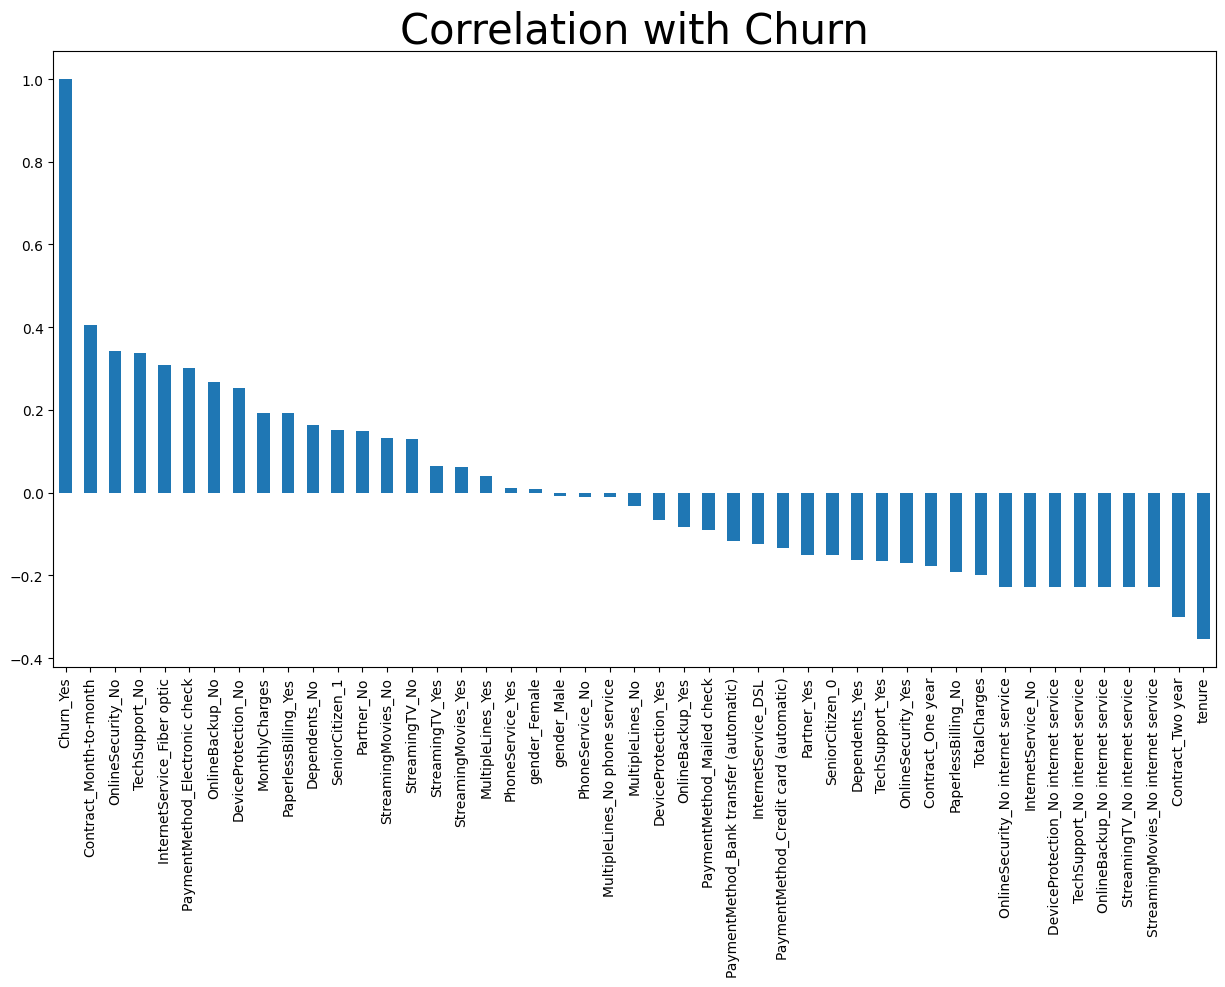

In [25]:
plt.figure(figsize=(15,8))
data_dummied_copy.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation with Churn",fontsize=30)

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X=data_dummied_copy.copy()
#X= sm.add_constant(data_dummied_copy)# Add Constant
y= X.pop("Churn_Yes")


features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))


#X=pd.DataFrame(scaler.transform(X))
X.columns = features
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# (1) Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
# if we use GridSearchCV : max_depth, ccp_alpha -> optimization is needed


In [28]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

cv=16

#Scoring
scoring='accuracy'

C=np.logspace(-4,5,20)

# ccp_alpha / max_depth
#ccp_alpha = np.linspace(1,10,9)
#max_depth = np.linspace(1,10,10)
max_depth = [int(x) for x in np.linspace(1,10,10)]
min_samples_leaf = np.linspace(1,5,5)
min_samples_split = np.linspace(1,5,5)
#ccp_alpha
#min_samples_leaf/min_samples_split -> ?

#param_grid =[{"max_depth":max_depth,"min_samples_leaf":min_samples_leaf,"min_samples_split":min_samples_split}]
param_grid =[{"max_depth":max_depth}]
gs=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=cv,
                scoring=scoring,return_train_score=True)

gs.fit(X_train,y_train)

GridSearchCV(cv=16, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='accuracy')

In [30]:
gs.best_params_

{'max_depth': 4}

In [31]:
path = dt_clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 3.95038319e-05 6.32061310e-05 6.58397198e-05
 7.11068974e-05 8.42748413e-05 1.18511496e-04 1.38263412e-04
 1.38263412e-04 1.40458069e-04 1.42213795e-04 1.43650298e-04
 1.48438641e-04 1.49236698e-04 1.54757279e-04 1.55142322e-04
 1.55725250e-04 1.55850734e-04 1.56156324e-04 1.58015327e-04
 1.58015327e-04 1.58015327e-04 1.58015327e-04 1.58015327e-04
 1.62067003e-04 1.68549683e-04 1.74746362e-04 1.75940386e-04
 1.77767243e-04 1.77767243e-04 1.77767243e-04 1.77767243e-04
 1.77767243e-04 1.77767243e-04 1.89618393e-04 1.89618393e-04
 1.89618393e-04 1.89618393e-04 1.89618393e-04 1.89618393e-04
 1.97519159e-04 1.97519159e-04 1.97519159e-04 1.97519159e-04
 1.97519159e-04 1.97519159e-04 1.97519159e-04 1.97519159e-04
 1.97519159e-04 1.97519159e-04 2.02091408e-04 2.03162564e-04
 2.03162564e-04 2.03162564e-04 2.06497303e-04 2.07395117e-04
 2.07395117e-04 2.07395117e-04 2.07395117e-04 2.10687103e-04
 2.10687103e-04 2.10687103e-04 2.10687103e-04 2.10687103e-04
 2.10687103e-04 2.127540

In [32]:
dt_clfs = []
for ccp_alpha in ccp_alphas:
    tClf = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    tClf.fit(X_train,y_train)
    dt_clfs.append(tClf)

In [33]:
node_counts = [clf.tree_.node_count for clf in dt_clfs]
depth = [clf.tree_.max_depth for clf in dt_clfs]

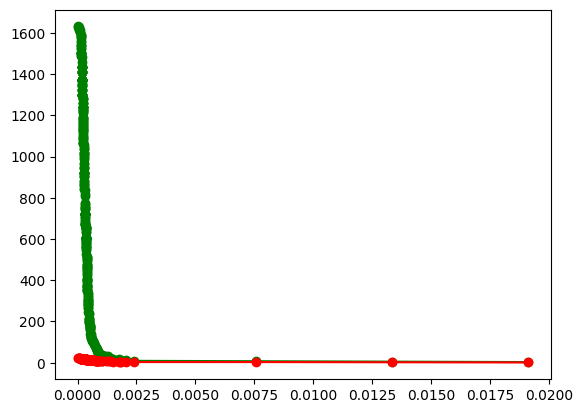

In [34]:


fig= plt.figure()
ax = fig.add_subplot(1,1,1)

minval = 0
plt.plot(ccp_alphas[minval:-1], node_counts[minval:-1], color='green',marker='o', linestyle='solid',label='noce_counts')
plt.plot(ccp_alphas[minval:-1], depth[minval:-1], color='red',marker='o', linestyle='solid',label='Depth')


In [35]:
len(ccp_alphas)

330

In [36]:
from sklearn.metrics import accuracy_score

train_acc=[]
test_acc=[]
for clf in dt_clfs:
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

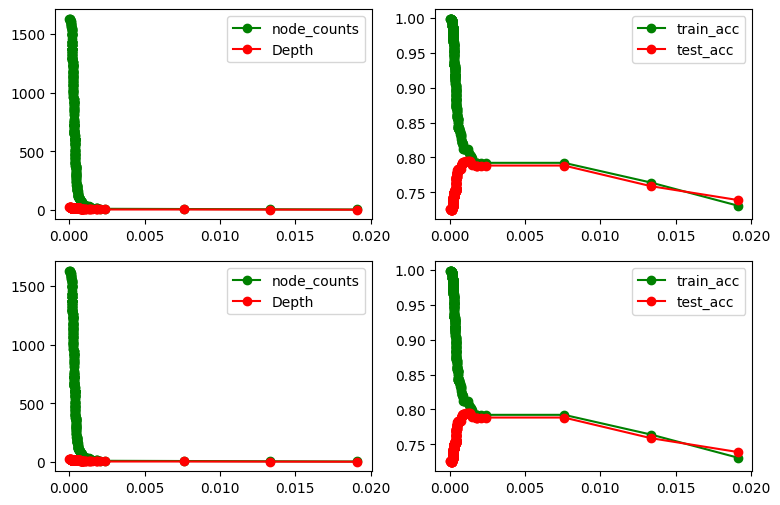

In [37]:
#fig= plt.figure()
#ax = fig.add_subplot(1,2,1)
fig, ax =plt.subplots(2,2,figsize=(9,6))

minval = 0
maxval = -1
ax[0][0].plot(ccp_alphas[minval:maxval], node_counts[minval:maxval], color='green',marker='o', linestyle='solid',label='node_counts')
ax[0][0].plot(ccp_alphas[minval:maxval], depth[minval:maxval], color='red',marker='o', linestyle='solid',label='Depth')
ax[0][0].legend(loc='upper right')

ax[0][1].plot(ccp_alphas[minval:maxval], train_acc[minval:maxval], color='green',marker='o', linestyle='solid',label='train_acc')
ax[0][1].plot(ccp_alphas[minval:maxval], test_acc[minval:maxval], color='red',marker='o', linestyle='solid',label='test_acc')
ax[0][1].legend(loc='upper right')

minval=0
maxval=-1

ax[1][0].plot(ccp_alphas[minval:maxval], node_counts[minval:maxval], color='green',marker='o', linestyle='solid',label='node_counts')
ax[1][0].plot(ccp_alphas[minval:maxval], depth[minval:maxval], color='red',marker='o', linestyle='solid',label='Depth')
ax[1][0].legend(loc='upper right')

ax[1][1].plot(ccp_alphas[minval:maxval], train_acc[minval:maxval], color='green',marker='o', linestyle='solid',label='train_acc')
ax[1][1].plot(ccp_alphas[minval:maxval], test_acc[minval:maxval], color='red',marker='o', linestyle='solid',label='test_acc')
ax[1][1].legend(loc='upper right')


In [38]:
dtf_Clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005, max_depth=5)
dtf_Clf.fit(X_train,y_train)
y_train_pred = dtf_Clf.predict(X_train)
y_test_pred = dtf_Clf.predict(X_test)

[Text(0.375, 0.875, 'Contract_Month-to-month <= 0.5\ngini = 0.393\nsamples = 4219\nvalue = [3084, 1135]\nclass = Stay'),
 Text(0.25, 0.625, 'gini = 0.118\nsamples = 1883\nvalue = [1764, 119]\nclass = Stay'),
 Text(0.5, 0.625, 'InternetService_Fiber optic <= 0.5\ngini = 0.492\nsamples = 2336\nvalue = [1320, 1016]\nclass = Stay'),
 Text(0.25, 0.375, 'tenure <= 0.021\ngini = 0.413\nsamples = 1062\nvalue = [753, 309]\nclass = Stay'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 283\nvalue = [143, 140]\nclass = Stay'),
 Text(0.375, 0.125, 'gini = 0.34\nsamples = 779\nvalue = [610, 169]\nclass = Stay'),
 Text(0.75, 0.375, 'tenure <= 0.204\ngini = 0.494\nsamples = 1274\nvalue = [567, 707]\nclass = Churn'),
 Text(0.625, 0.125, 'gini = 0.416\nsamples = 633\nvalue = [187, 446]\nclass = Churn'),
 Text(0.875, 0.125, 'gini = 0.483\nsamples = 641\nvalue = [380, 261]\nclass = Stay')]

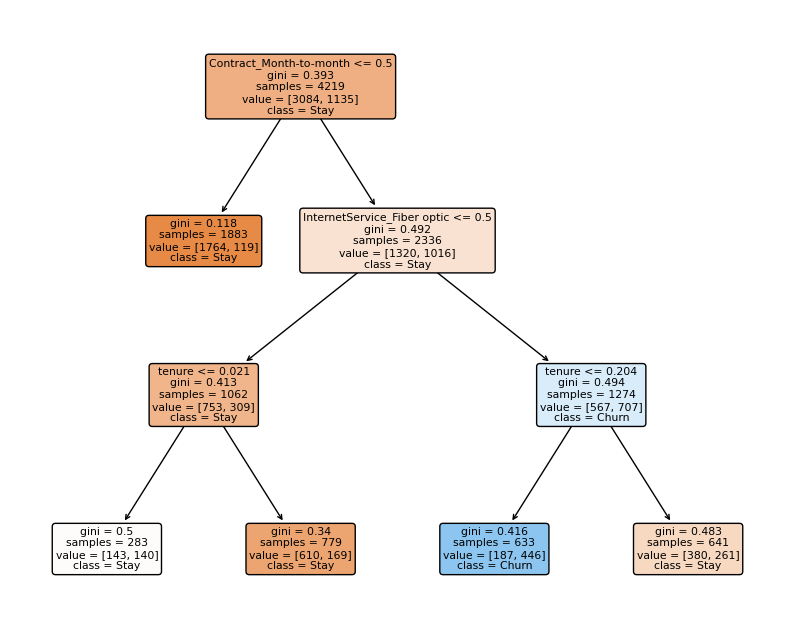

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(dtf_Clf,filled=True, rounded=True, class_names=['Stay','Churn'],feature_names=X.columns.values)

데이터셋이 불균형하면 accuracy보다 f1이 나은가?

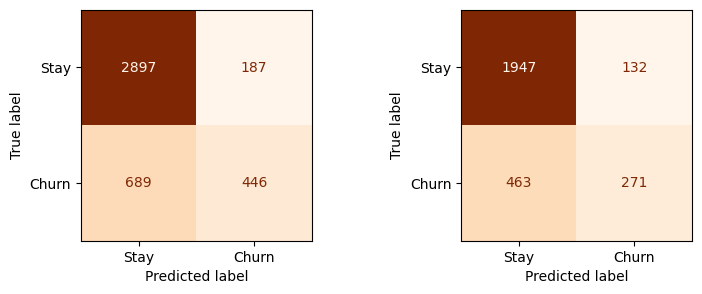

In [40]:
fig, ax =plt.subplots(1,2,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_train,dtf_Clf.predict(X_train),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,dtf_Clf.predict(X_test),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

In [41]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,dtf_Clf.predict(X_test)))

0.7884820476359758


# (2) Bagging :: Ensemble (RandomForest)

In [43]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=10)
RF_clf.fit(X_train,y_train)
n_estimators = [10, 20, 50, 100, 200]
max_depth = [int(x) for x in np.linspace(1,10,10)]
cv=10

param_grid = [{"n_estimators":n_estimators, "max_depth":max_depth}]
rf_gs=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=cv,
                scoring=scoring,return_train_score=True)
rf_gs.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [10, 20, 50, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [44]:
rf_gs.best_params_

{'max_depth': 7, 'n_estimators': 200}

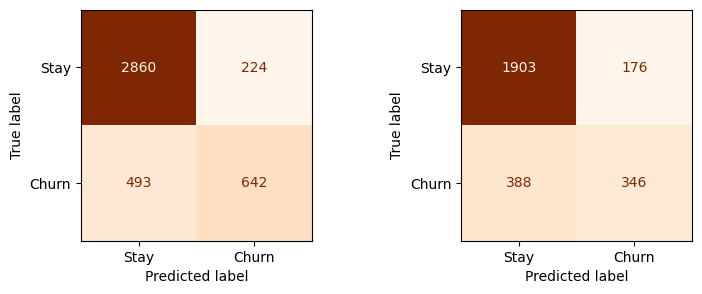

In [45]:
#gs.predict(X_train,y_train)

fig, ax =plt.subplots(1,2,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_train,rf_gs.predict(X_train),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,rf_gs.predict(X_test),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

In [46]:
print(metrics.accuracy_score(y_test,rf_gs.predict(X_test)))

0.79950231070032


# (3) AdaBoost :: Ensemble

In [47]:
from sklearn.ensemble import AdaBoostClassifier

#RF_clf = RandomForestClassifier(n_estimators=10)
#RF_clf.fit(X_train,y_train)
n_estimators = [10, 20, 50, 100, 200]
learning_rate = np.linspace(0.1,1,10)
cv=10

param_grid = [{"n_estimators":n_estimators, "learning_rate":learning_rate}]
ab_gs=GridSearchCV(AdaBoostClassifier(),param_grid=param_grid,cv=cv,
                scoring=scoring,return_train_score=True)
ab_gs.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                          'n_estimators': [10, 20, 50, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [48]:
ab_gs.best_params_

{'learning_rate': 0.4, 'n_estimators': 50}

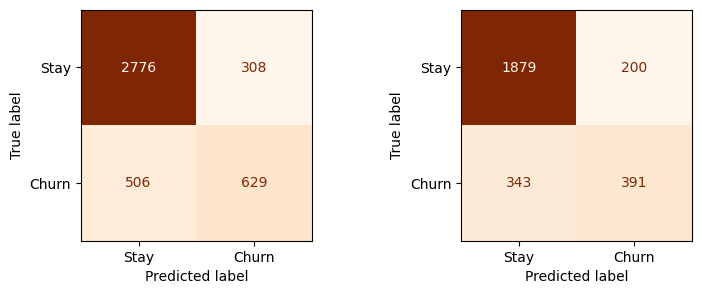

In [49]:
#gs.predict(X_train,y_train)

fig, ax =plt.subplots(1,2,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_train,ab_gs.predict(X_train),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,ab_gs.predict(X_test),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

In [50]:
print(metrics.accuracy_score(y_test,ab_gs.predict(X_test)))

0.8069676501955207


# (4) XGBoost :: Ensemble

In [56]:
from xgboost import XGBClassifier

#param_grid=[{'n_estimators':}]
n_estimators=[100,200,300,400,500]
learning_rate = [0.01,0.05,0.1,0.15]
max_depth = [int(x) for x in np.linspace(1,10,10)]
gamma=[0,1,2,3]

param_grid = [{"n_estimators":n_estimators, "learning_rate":learning_rate}]
xg_gs=GridSearchCV(AdaBoostClassifier(),param_grid=param_grid,cv=cv,
                scoring=scoring,return_train_score=True)
xg_gs.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1, 0.15],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True, scoring='accuracy')

In [57]:
xg_gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

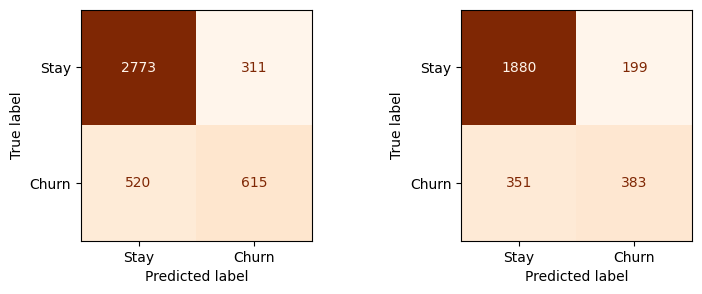

In [58]:
#gs.predict(X_train,y_train)

fig, ax =plt.subplots(1,2,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_train,xg_gs.predict(X_train),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,xg_gs.predict(X_test),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

In [59]:
print(metrics.accuracy_score(y_test,xg_gs.predict(X_test)))

0.8044792036971206


# (5) Stacking :: Ensemble

In [60]:
def predict_array(data):
    pred1=dtf_Clf.predict(data)
    pred2=rf_gs.predict(data)
    pred3=ab_gs.predict(data)
    pred4=xg_gs.predict(data)
    
    pred = np.array([pred1, pred2, pred3, pred4])
    return np.transpose(pred)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#pred = np.array([pred1, pred2, pred3, pred4])
#pred = np.array([pred1, pred2, pred3])
pred=predict_array(X_train)
#print("pred shape : ",pred.shape)
#pred = np.transpose(pred)

#lr_final = LogisticRegression(C=10)
lr_final = SVC(kernel='linear')

lr_final.fit(pred,y_train)

SVC(kernel='linear')

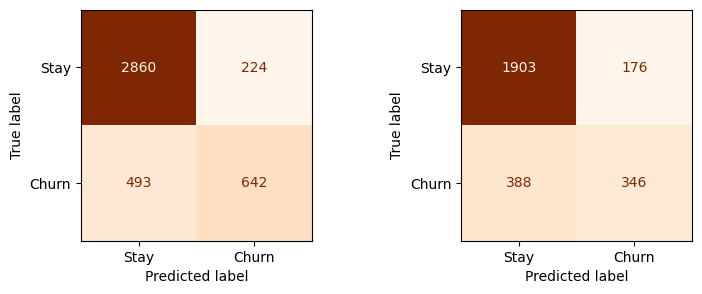

In [62]:
#gs.predict(X_train,y_train)

fig, ax =plt.subplots(1,2,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_train,lr_final.predict(predict_array(X_train)),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,lr_final.predict(predict_array(X_test)),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

In [63]:
print(metrics.accuracy_score(y_test,lr_final.predict(predict_array(X_test))))

0.79950231070032
